### Importing the Required Packages to Solve the Problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the Required Dataset

In [3]:
data = pd.read_csv("C:\Users\hr\Downloads\ML_Practice\Practice-ML-Algorithms\ANN\Churn_Modelling.csv")

### Data Exploration

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

This data shows that there are 10,000 recors with 14 Parameters. Out of 14, 13 parameters are predictor variables and 1 parameter is a response variable ("Exited").

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 2 float type parameters, 9 Integer variables and 3 String type variables.

### Identify the Missing Values

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Fortunately, there are no missing values in our data

### Split the Data into Predictor and Response Variables

In [8]:
x = data.drop("Exited", axis=1)

In [9]:
y = data['Exited']

In [10]:
x.shape

(10000, 13)

In [11]:
y.shape

(10000,)

In [12]:
data['Surname'].value_counts()

Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Olague         1
Jack           1
Menhennitt     1
Cantrell       1
Nuttall        1
Name: Surname, Length: 2932, dtype: int64

In [13]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Number of People for Each country')

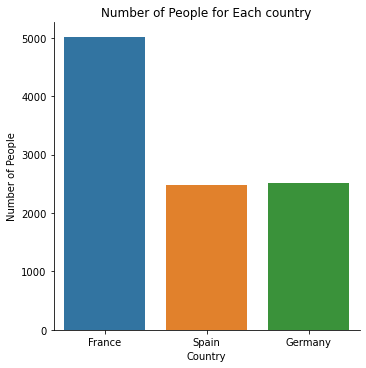

In [14]:
sns.catplot('Geography', data=data, kind='count')
plt.xlabel("Country")
plt.ylabel("Number of People")
plt.title("Number of People for Each country")

Based on Geography, we identified that there are people from France,Germany and Spain countries in that Bank.

In [15]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Classification')

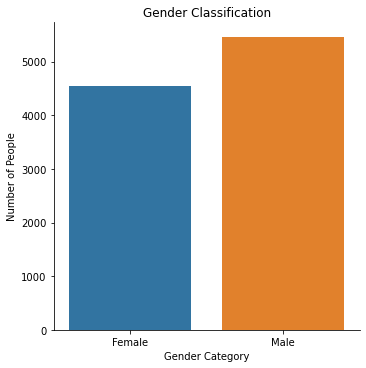

In [16]:
sns.catplot('Gender', data=data, kind='count')
plt.xlabel("Gender Category")
plt.ylabel("Number of People")
plt.title("Gender Classification")

Graph tells us that the Bank has 5457 Male customers and 4543 female customers

In [17]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Text(0.5, 1.0, 'Identify People with Credit Card')

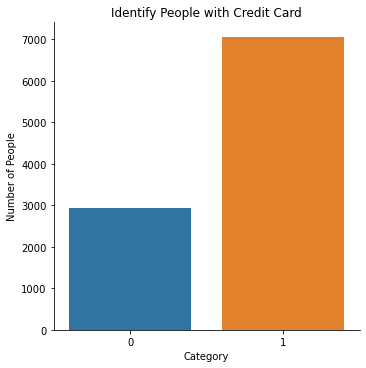

In [18]:
sns.catplot('HasCrCard', data=data, kind='count')
plt.xlabel("Category")
plt.ylabel("Number of People")
plt.title("Identify People with Credit Card")

Graph tells us that there are more people with credit card and also few people without credit cards. Number of people with credit cards are 7055 and people without credit cards are 2945

In [19]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Text(0.5, 1.0, 'Identify Active Members')

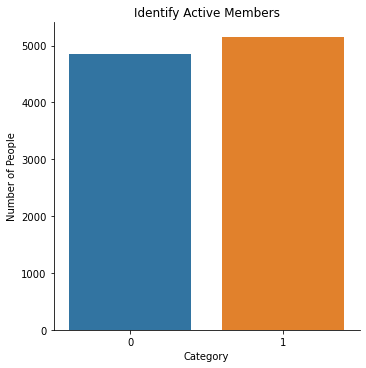

In [20]:
sns.catplot('IsActiveMember', data=data, kind='count')
plt.xlabel("Category")
plt.ylabel("Number of People")
plt.title("Identify Active Members")

Graph shows us that active customers are 5151 and non-active customers are almost as equal as active customers with the value 4849.

Since there are 3 object type data variables(i.e, Surname, Geography and Gender). Out of which, surname is not required for our data processing, so, we neglect it and we create some dummy variables for Geography and Gender columns for performing the computations on string type data.

In [21]:
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [22]:
geography.shape

(10000, 2)

In [23]:
gender.shape

(10000, 1)

In [24]:
x.shape

(10000, 13)

In [25]:
x = pd.concat([x, geography, gender], axis=1)

In [26]:
x.shape

(10000, 16)

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Germany          10000 non-null  uint8  
 14  Spain            10000 non-null  uint8  
 15  Male             10000 non-null  uint8  
dtypes: float64(2), int64(8), object(3), uint8(3)
memory usage: 

In [28]:
x=x.drop(["Geography", "Gender", "Surname","RowNumber","CustomerId"], axis=1)

In [29]:
x.shape

(10000, 11)

As you have added the encoded values for both geography and gender parameters to your predictor variables dataset, we need to remove the object columns.

### Split the Dataset into train and test sets

Test size is taken as 25%.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [32]:
x_train.shape

(7500, 11)

In [33]:
x_test.shape

(2500, 11)

In [34]:
y_train.shape

(7500,)

In [35]:
y_test.shape

(2500,)

In [36]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7777,711,21,0,82844.33,2,0,1,1408.68,0,0,0
4998,559,40,7,144470.77,1,1,1,18917.95,0,1,0
4165,775,60,7,0.00,2,1,1,111558.70,0,0,1
9645,695,31,5,106089.20,1,0,0,99537.68,0,0,0
1707,707,40,5,0.00,2,1,0,41052.82,0,0,0


### Perform Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scale = StandardScaler()

In [39]:
x_train = scale.fit_transform(x_train)

In [40]:
x_test = scale.fit_transform(x_test)

In [41]:
x_train.shape

(7500, 11)

### Model implementation

Importing all the Deep Learning required Libraries

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Using TensorFlow backend.


### Initializing the ANN Model

In [43]:
model = Sequential()

Adding the input layer and the hidden layers

In [44]:
model.add(Dense(units = 10, kernel_initializer = "he_normal", activation = "relu", input_dim = 11))
model.add(Dropout(0.3))

Adding the second hidden Layer

In [45]:
model.add(Dense(units=20, kernel_initializer="he_normal", activation = "relu"))
model.add(Dropout(0.4))

Adding the third hidden layer

In [46]:
model.add(Dense(units=15, kernel_initializer="he_normal", activation = "relu"))
model.add(Dropout(0.2))

Adding the Output Layer

In [47]:
model.add(Dense(units=1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

Compiling the Artificial Neural Network Model

In [49]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics =['accuracy'])

Fitting the Neural Network Model to our Training Data

In [50]:
model_fit = model.fit(x_train, y_train, validation_split = 0.25, batch_size=10, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.5698 - accuracy: 0.7716 - val_loss: 0.5075 - val_accuracy: 0.7872
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.5116 - accuracy: 0.7957 - val_loss: 0.4819 - val_accuracy: 0.7872
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4859 - accuracy: 0.7970 - val_loss: 0.4646 - val_accuracy: 0.7872
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7986 - val_loss: 0.4577 - val_accuracy: 0.7877
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7995 - val_loss: 0.4453 - val_accuracy: 0.7883
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.7989 - val_loss: 0.4453 - val_accuracy: 0.7888
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8021 - val_loss: 0.4339 - val_accuracy: 0.7920

List all the Data in history

In [51]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


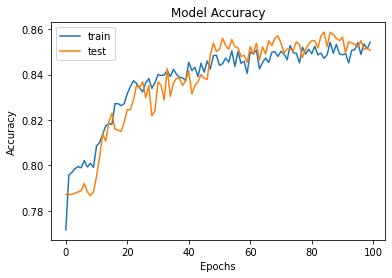

In [52]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','test'], loc = 'upper left')
plt.show()

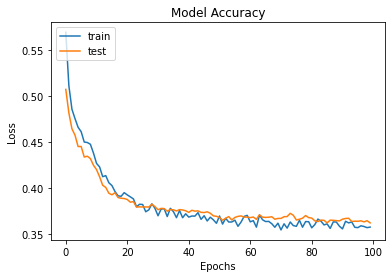

In [53]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','test'], loc = 'upper left')
plt.show()

It's time to predict the test results now

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([[0.5059972 ],
       [0.05070314],
       [0.26750195],
       ...,
       [0.08471518],
       [0.26750195],
       [0.04094827]], dtype=float32)

In [56]:
y_pred = (y_pred>0.5)

After predicting the output, our next task is to identify the performance of the model using different performance metrics

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1901,   98],
       [ 282,  219]])

In [59]:
acc_sc = accuracy_score(y_test, y_pred)
acc_sc

0.848